# Association Rule for Store Dataset

## Load Data

Load data dan tunjukan 5 row pertamanya

Dataset :
https://raw.githubusercontent.com/GTerrence/dataset/main/Groceries%20data.csv

In [26]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.preprocessing import OneHotEncoder

! pip install mlxtend

In [27]:
df = pd.read_csv("https://raw.githubusercontent.com/GTerrence/dataset/main/Groceries%20data.csv")
df.head(10)

,Member_number,Date,itemDescription,year,month,day,day_of_week
0,1808,2015-07-21,tropical fruit,2015,7,21,1
1,2552,2015-05-01,whole milk,2015,5,1,4
2,2300,2015-09-19,pip fruit,2015,9,19,5
3,1187,2015-12-12,other vegetables,2015,12,12,5
4,3037,2015-01-02,whole milk,2015,1,2,4
5,4941,2015-02-14,rolls/buns,2015,2,14,5
6,4501,2015-08-05,other vegetables,2015,8,5,2
7,3803,2015-12-23,pot plants,2015,12,23,2
8,2762,2015-03-20,whole milk,2015,3,20,4
9,4119,2015-12-02,tropical fruit,2015,12,2,2


<h2> EDA

In [28]:
print("Jumlah data awal: ",df.shape)
df.drop_duplicates(keep='first', inplace=True)
print("Jumlah data akhir: ", df.shape)

Jumlah data awal:  (38765, 7)
Jumlah data akhir:  (38006, 7)


In [29]:
df.isnull().sum()

Member_number      0
Date               0
itemDescription    0
year               0
month              0
day                0
day_of_week        0
dtype: int64

In [30]:
df.describe()

,Member_number,year,month,day,day_of_week
count,38006.000000,38006.000000,38006.000000,38006.000000,38006.000000
mean,3003.361390,2014.525733,6.480450,15.748566,3.015576
std,1153.659151,0.499344,3.430621,8.796435,1.988222
min,1000.000000,2014.000000,1.000000,1.000000,0.000000
25%,2001.000000,2014.000000,4.000000,8.000000,1.000000
50%,3005.000000,2015.000000,6.000000,16.000000,3.000000
75%,4007.000000,2015.000000,9.000000,23.000000,5.000000
max,5000.000000,2015.000000,12.000000,31.000000,6.000000


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38006 entries, 0 to 38764
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Member_number    38006 non-null  int64 
 1   Date             38006 non-null  object
 2   itemDescription  38006 non-null  object
 3   year             38006 non-null  int64 
 4   month            38006 non-null  int64 
 5   day              38006 non-null  int64 
 6   day_of_week      38006 non-null  int64 
dtypes: int64(5), object(2)
memory usage: 2.3+ MB


In [32]:
df.rename(columns = {'Member_number':'member_number', 'Date':'date', 'itemDescription':'item_description'}, inplace = True)
df = df.astype(str)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38006 entries, 0 to 38764
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   member_number     38006 non-null  object
 1   date              38006 non-null  object
 2   item_description  38006 non-null  object
 3   year              38006 non-null  object
 4   month             38006 non-null  object
 5   day               38006 non-null  object
 6   day_of_week       38006 non-null  object
dtypes: object(7)
memory usage: 2.3+ MB


In [33]:
df["order_id"]=df["member_number"]+"_"+df["date"]
df.head()

,member_number,date,item_description,year,month,day,day_of_week,order_id
0,1808,2015-07-21,tropical fruit,2015,7,21,1,1808_2015-07-21
1,2552,2015-05-01,whole milk,2015,5,1,4,2552_2015-05-01
2,2300,2015-09-19,pip fruit,2015,9,19,5,2300_2015-09-19
3,1187,2015-12-12,other vegetables,2015,12,12,5,1187_2015-12-12
4,3037,2015-01-02,whole milk,2015,1,2,4,3037_2015-01-02


<h2> Data Preprocessing

Ubahlah dataset di atas menjadi bentuk one hot encoding. Asumsikanlah bahwa pembelian barang yang dilakukan oleh Customer ID yang sama dalam hari yang sama terjadi dalam 1 transaksi yang sama (satu Order ID)

contoh :
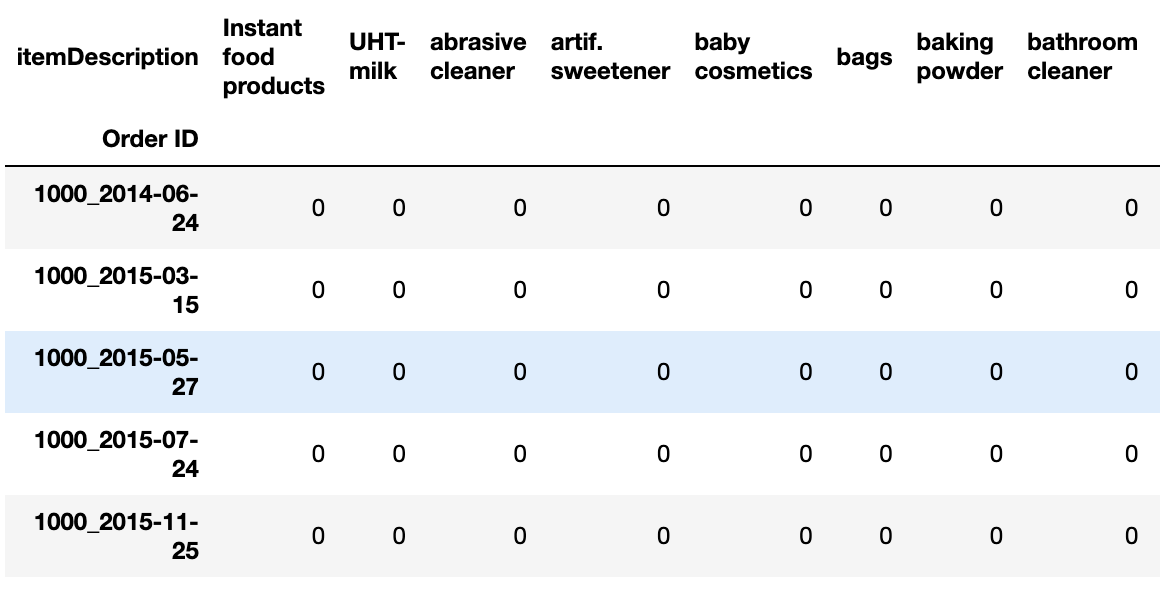

In [34]:
df2 = pd.DataFrame(df,columns=['order_id','item_description'])
df2.head()

,order_id,item_description
0,1808_2015-07-21,tropical fruit
1,2552_2015-05-01,whole milk
2,2300_2015-09-19,pip fruit
3,1187_2015-12-12,other vegetables
4,3037_2015-01-02,whole milk


In [35]:
df2 = df2.groupby(['order_id', 'item_description'])['item_description'].count().unstack().fillna(0)
df2.head()

item_description,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
order_id,,,,,,,,,,,,,,,,,,,,,
1000_2014-06-24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1000_2015-03-15,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
1000_2015-05-27,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1000_2015-07-24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1000_2015-11-25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [38]:
def change_value(encode):
    if encode >= 1 :
        return 1
    else: 
        return 0

df2 = df2.applymap(change_value)
df2.head()

item_description,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
order_id,,,,,,,,,,,,,,,,,,,,,
1000_2014-06-24,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1000_2015-03-15,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
1000_2015-05-27,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1000_2015-07-24,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1000_2015-11-25,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Apriori Algorithm

Gunakanlah algroitma apriori untuk mencari tahu produk mana yang sering dibeli secara bersama-sama (min support = 0.01)

In [40]:
#Set threshold value untuk digunakan dalam penghitungan support
from mlxtend.frequent_patterns import apriori, association_rules
df_apriori = apriori(df2, min_support = 0.01, use_colnames = True)
df_apriori

C:\Users\User\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
C:\Users\User\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.021386,(UHT-milk)
1,0.033950,(beef)
2,0.021787,(berries)
3,0.016574,(beverages)
4,0.045312,(bottled beer)
...,...,...
64,0.010559,"(rolls/buns, other vegetables)"
65,0.014837,"(whole milk, other vegetables)"
66,0.013968,"(whole milk, rolls/buns)"
67,0.011629,"(whole milk, soda)"


Berdasarkan hasil di atas, buatlah association rules nya dengan syarat min confidence = 0.1 

In [41]:
df_ar = association_rules(df_apriori, metric = "confidence", min_threshold = 0.1)
df_ar

C:\Users\User\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(other vegetables),(whole milk),0.122101,0.157923,0.014837,0.121511,0.769430,-0.004446,0.958551
1,(rolls/buns),(whole milk),0.110005,0.157923,0.013968,0.126974,0.804028,-0.003404,0.964550
2,(soda),(whole milk),0.097106,0.157923,0.011629,0.119752,0.758296,-0.003707,0.956636
3,(yogurt),(whole milk),0.085879,0.157923,0.011161,0.129961,0.822940,-0.002401,0.967861
